['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


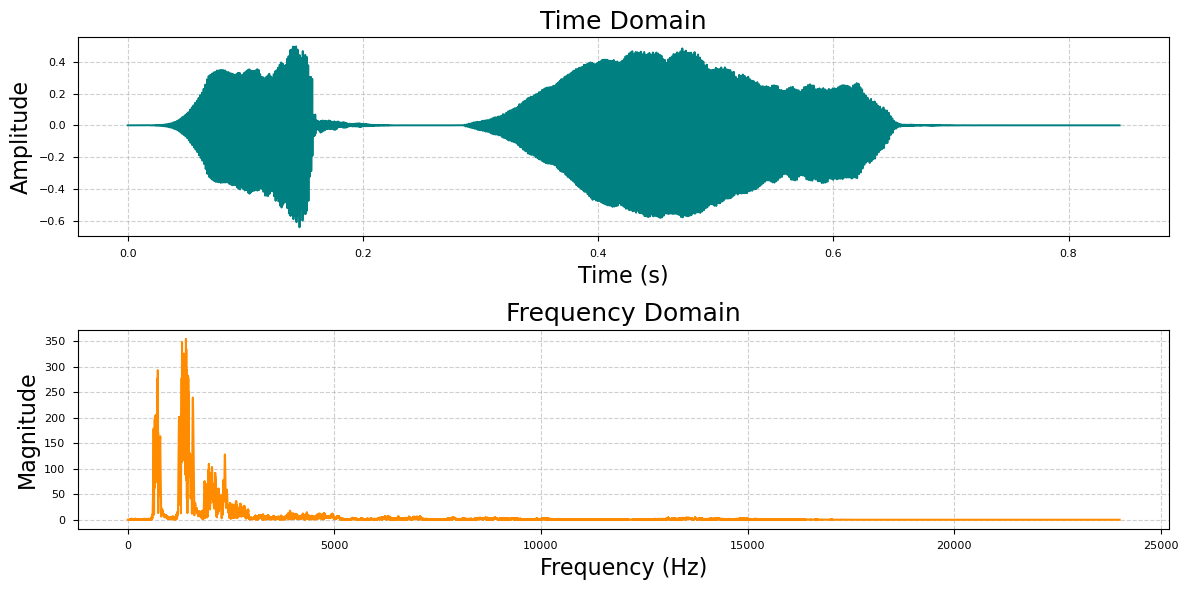

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
print(plt.style.available)

plt.style.use('seaborn-v0_8-paper')  
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

yinpin_file = "brid.mp3" 

y, sr = librosa.load(yinpin_file, sr=None)


duration = len(y) / sr 
time = np.linspace(0, duration, len(y))


fft = np.fft.fft(y) 
frequencies = np.fft.fftfreq(len(fft), d=1/sr)
magnitude = np.abs(fft)


positive_freq_idx = frequencies >= 0
frequencies = frequencies[positive_freq_idx]
magnitude = magnitude[positive_freq_idx]


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, y, color='teal')
plt.title("Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude, color='darkorange', lw=1.5)
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("111.png", dpi=300)
# plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


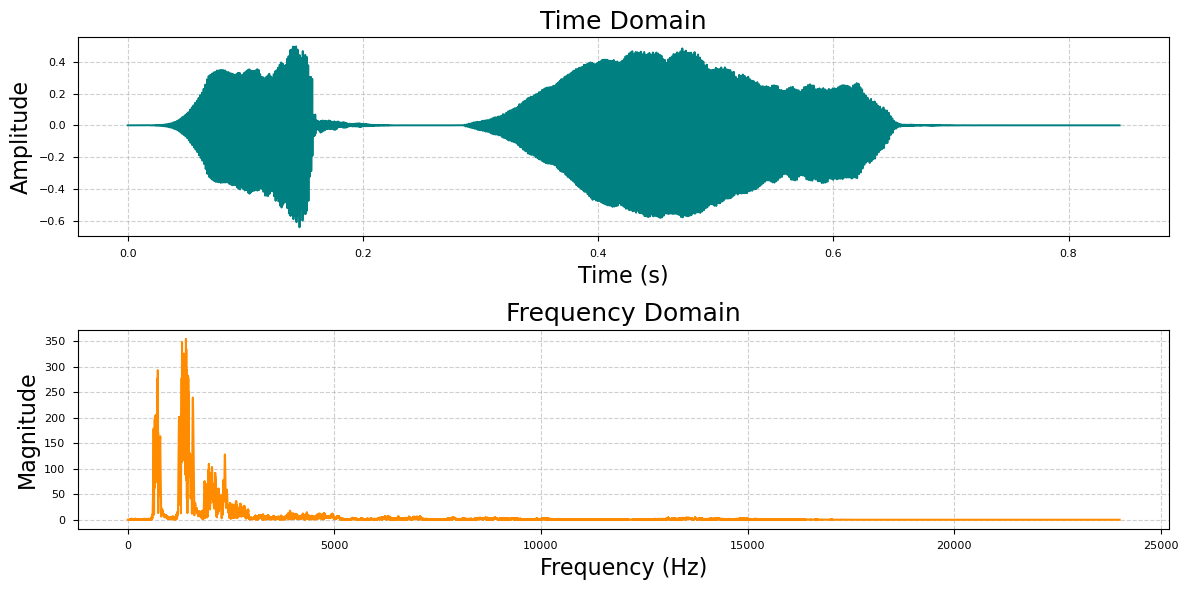

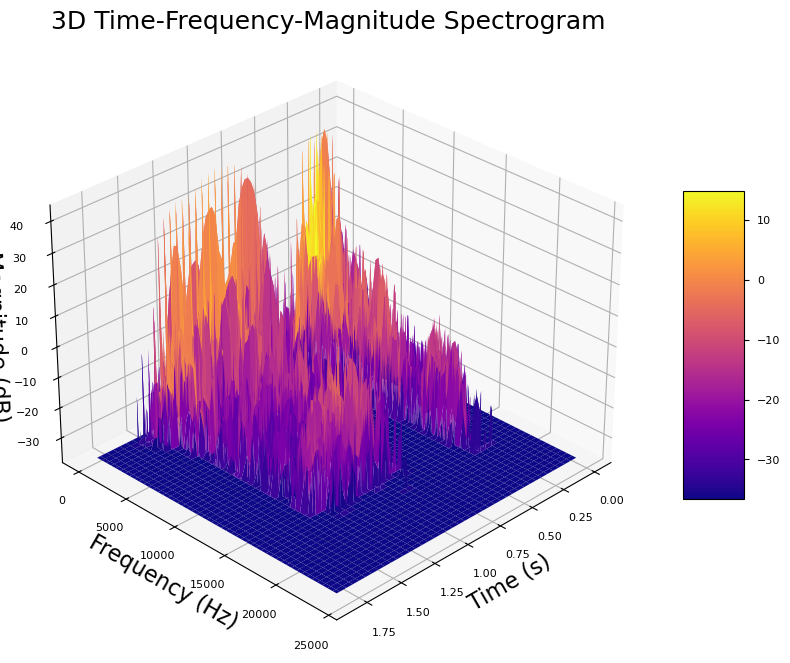

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(plt.style.available)

plt.style.use('seaborn-v0_8-paper')  
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

yinpin_file = "brid.mp3" 

y, sr = librosa.load(yinpin_file, sr=None)


duration = len(y) / sr 
time = np.linspace(0, duration, len(y))


fft = np.fft.fft(y) 
frequencies = np.fft.fftfreq(len(fft), d=1/sr)
magnitude = np.abs(fft)


positive_freq_idx = frequencies >= 0
frequencies = frequencies[positive_freq_idx]
magnitude = magnitude[positive_freq_idx]


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, y, color='teal')
plt.title("Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude, color='darkorange', lw=1.5)
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("111.png", dpi=300)
# plt.show()


stft = librosa.stft(y)
mag_db = librosa.amplitude_to_db(np.abs(stft)) 
times = librosa.times_like(stft)
freqs = librosa.fft_frequencies(sr=sr)


X, Y = np.meshgrid(times, freqs)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, mag_db, cmap='plasma', edgecolor='none', antialiased=True)
ax.set_title("3D Time-Frequency-Magnitude Spectrogram")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_zlabel("Magnitude (dB)")
ax.view_init(elev=30, azim=45)  
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


# ax.set_ylim(0, 8000)  # 限制到0-8000 Hz

plt.savefig("3d_spectrogram.png", dpi=300)
# plt.show()